# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

# Adaline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd

## Treinamento Adaline

In [124]:
def trainAdaline(xin, yd, eta, tol, maxepocas, par):
# xin : matriz Nxn com os dados de entrada
# yd: rótulos de saída (0 ou 1)
# eta : passo de treinamento
# tol : tolerância de erro
# maxepocas: número máximo de iterações par : parâmetro de entrada .
# # par=0 ==> xin tem dimensão n+1 e já inclui
# # entrada correspondente ao termo
# # de polarização.
# # par=1 ==> xin tem dimensão n e não inclui

    xin = pd.DataFrame(xin)
    yd = pd.DataFrame(yd)

    nSamples = xin.shape[0]     # Numero de amostras.
    nDimension = xin.shape[1]     # Dimensao de entrada.

    # Adiciona ou não um termo de polarização ao vetor de treinamento w.
    if par == 1:
        wt = pd.DataFrame(np.random.sample(nDimension+1) - 0.5)
        xin.insert(nDimension, nDimension, 1)
    else:
        wt = pd.DataFrame(np.random.sample(nDimension) - 0.5)

    nepocas = 0 # Contador de epocas
    eepoca = tol + 1 # Acumulador de erro de epocas

    evec = [maxepocas] # Vetor de erros

    # Laço principal de treinamento
    while (nepocas < maxepocas) & (eepoca > tol):
        ei2 = 0
        #Sequencia aleatória de treinamento
        xseq = np.random.randint(0, nSamples, nSamples)

        for i in range(nSamples):

            # Amostra dado da sequencia aleatória
            irand = xseq[i]

            # Calcula saída do Adaline
            yhati = 1.0 * np.dot(wt.T, pd.DataFrame(xin.loc[irand])) # yhati = xin[i] X wt.T
            yhati = pd.DataFrame(yhati)

            # Calcula erro
            ei = yd.loc[irand] - yhati        # erro: ei = (yi − yˆi)
            ei = pd.to_numeric(ei[0][0])

            # Calcula variaçao no peso
            dw = eta * (ei * xin.loc[irand])  # dw = η ei xis
            dw = pd.DataFrame(dw).to_numpy()

            # Ajusta vetor de pesos
            wt = pd.DataFrame(wt).to_numpy()
            wt = wt + dw                     # w(t+1) = w(t) + dw(t) 
            
            # Acumula erro por época
            ei2 += ei**2 

        # Incrementa número de épocas
        nepocas = nepocas + 1
        evec.append(ei2/nSamples)

        # Armazena erro por época
        eepoca = evec[nepocas]

    # Retorna vetores de pesos e de erros
    retlist = [wt, evec[1:nepocas]]

    return retlist
    

Na céluna de Estudo dos slides segue o link abaixo para acessar os arquivos:


https://github.com/jueta/Artificial-Neural-Networks/tree/main/课三

## Estudo Slides

Suponha que a fun ̧c ̃ao f(x) represente um processo industrial que aumenta em 4 vezes a magnitude de qualquer sinal em sua entrada e adiciona duas unidades ao valor obtido.

f(x) = 4x + 2

w:  [[3.87295428]
 [1.99518865]]


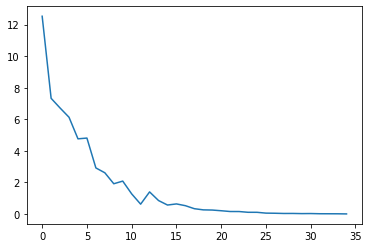

In [209]:
t = np.arange(0, 2*np.pi, 0.1*np.pi)
x = np.sin(t)
y = 4*x + 2

retlist = trainAdaline(x,y,0.01,0.01,50,1)
w = retlist[0]
erro = retlist[1]

plt.plot(erro)
print("w: ", w)


### Problema multivariado

f(x4,x3,x2,x1) = a4x4 + a3x3 + a2x2 + a1x1 + a0x0

y = 3.2x4 + 0.8x3 + 2x2 + x1 + pi


w:  [[0.97214673]
 [1.83412069]
 [0.79084329]
 [2.53354701]
 [2.13848403]]


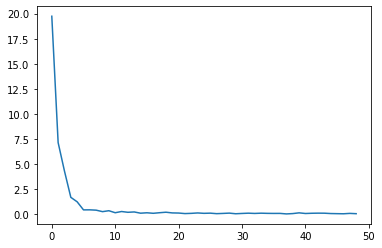

In [218]:
t = np.arange(0, 2*np.pi, 0.1*np.pi)

x1 = pd.Series(np.sin(t)+np.cos(t))
x2 = pd.Series(np.tanh(t))
x3 = pd.Series(np.sin(4*t))
x4 = pd.Series(abs(np.sin(t)))

x = pd.concat([x1,x2,x3,x4], axis=1)
y = x1 + 2*x2 + 0.8*x3 + 3.2*x4 + np.pi/2

retlist = trainAdaline(x,y,0.01,0.01,50,1)

w = retlist[0]
erro = retlist[1]

plt.plot(erro)
print("w: ", w)

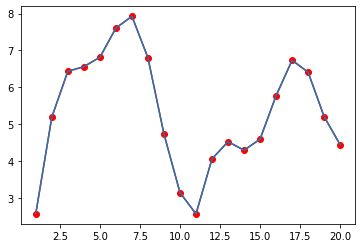

In [235]:
ttest = np.arange(0, 2*np.pi, 0.1*np.pi)
x0t = pd.Series(1)
x1t = pd.Series(np.sin(ttest)+np.cos(ttest))
x2t = pd.Series(np.tanh(ttest))
x3t = pd.Series(np.sin(4*ttest))
x4t = pd.Series(abs(np.sin(ttest)))

xt = pd.concat([x0t,x1t,x2t,x3t,x4t], axis=1)

yt =  np.dot(xt, w)
yreal = 3.2*x4t + 0.8*x3t + 2*x2t + x1t + np.pi/2

# plt.scatter(t, yreal)
plt.plot(range(1, len(yreal) + 1), yreal, marker = 'o', color = 'red')
plt.plot(range(1, len(y) + 1), y)

# Plot the training error
# plt.plot(range(1, len(erro) + 1), erro, marker = 'o', color = 'red')
# plt.xlabel('Epochs')
# plt.ylabel('Sum-squared-error')
# plt.show()

# # Plot the decision boundary
# pdr.plot_decision_regions(X_std, y, classifier = model1)
# plt.title('Adaline - Gradient Descent')
# plt.xlabel('sepal length [standardized')
# plt.ylabel('petal length [standardized]')
# plt.legend(loc = 'upper left')
plt.show()

### Exemplo com dados reais


In [8]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


## Exercicio 3 - Adaline

### Exercicio 3.1 - Modelo Univariado

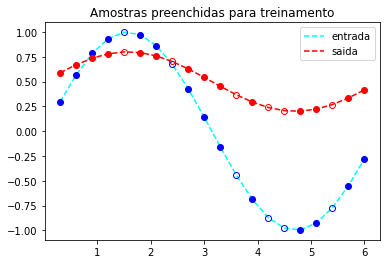

In [208]:
# Importando dados
Ex1_t = pd.read_table("dados/Ex1_t") # tempos de amostragem dos sinais
Ex1_x = pd.read_table("dados/Ex1_x") # Sinal de Entrada
Ex1_y = pd.read_table("dados/Ex1_y") # Sinal de saida

Ex1_t =Ex1_t.to_numpy()
Ex1_x =Ex1_x.to_numpy()
Ex1_y =Ex1_y.to_numpy()

testData = []
test_x = []
test_y = []
test_t = []
trainData = []
train_x = []
train_y = []
train_t = []

for i in range(len(t)):
    if(i == 4 or i ==  7 or i ==  11 or i ==  13 or i ==  14 or i ==  17):
        testData.append([Ex1_t[i], Ex1_x[i]])
        test_t.append(Ex1_t[i])
        test_x.append(Ex1_x[i])
        test_y.append(Ex1_y[i])
    else:
        trainData.append([Ex1_t[i], Ex1_x[i]])
        train_t.append(Ex1_t[i])
        train_x.append(Ex1_x[i])
        train_y.append(Ex1_y[i])


plt.plot(Ex1_t, Ex1_x, '--', color="cyan", label='entrada')
plt.plot(test_t, test_x, 'o', color="blue", mfc='none')
plt.plot(train_t, train_x, 'o', color="blue")
plt.plot(Ex1_t, Ex1_y, '--', color="red", label='saida')
plt.plot(test_t, test_y, 'o', color="red", mfc='none')
plt.plot(train_t, train_y, 'o', color="red")
plt.legend()
plt.title("Amostras preenchidas para treinamento")

plt.show()

w:  [[0.25194741]
 [0.51356029]]


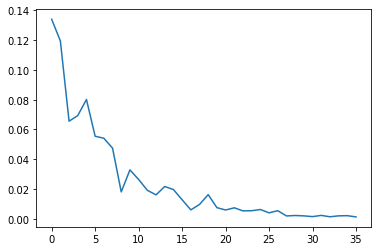

In [209]:
retlist = trainAdaline(train_x,train_y,0.01,0.001,100,1)

w = retlist[0]
erro = retlist[1]

plt.plot(erro)
print("w: ", w)

In [210]:
# teste
test_x = pd.DataFrame(test_x)
train_x = pd.DataFrame(train_x)

# Adiciona coluna 1
test_x.insert(len(test_x.columns), 1, 1)
train_x.insert(len(train_x.columns), 1, 1)

yhat = np.dot(test_x, w)
yhattrain = np.dot(train_x, w)  # yhattrain<-(cbind(1,xtrain) %*% w)

Text(0.5, 1.0, 'Amostras preenchidas usadas para Teste')

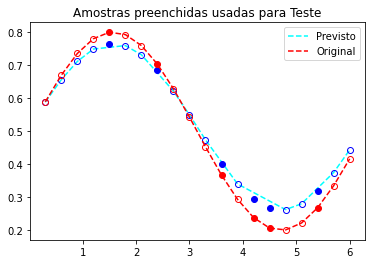

In [211]:
# plotting results
plt.plot(train_t, yhattrain, '--', color="cyan", label='Previsto')
plt.plot(test_t, yhat, 'o', color="blue")
plt.plot(train_t, yhattrain, 'o', color="blue", mfc='none')
plt.plot(Ex1_t, Ex1_y, '--', color="red", label='Original')
plt.plot(test_t, test_y, 'o', color="red")
plt.plot(train_t, train_y, 'o', color="red", mfc='none')
plt.legend()
plt.title("Amostras preenchidas usadas para Teste")

### Exercicio 3.2 - Modelo Multivariado

Suponha agora um problema ligeiramente diferente, em que o sistema observado possui 3 entradas e uma saída, a qual aparenta ser uma mistura dos sinais de entrada. A sua tarefa é, novamente, modelá-lo com o Adaline, considerando que a saída possa ser representada na forma 𝑦 = 𝑎+𝑏*𝑥1 +𝑐*𝑥2 +𝑑*𝑥3, em que 𝑥1, 𝑥2 e 𝑥3 são os sinais de entrada, 𝑦 a saída e 𝑎, 𝑏, 𝑐, 𝑑 os coeficientes da mistura.

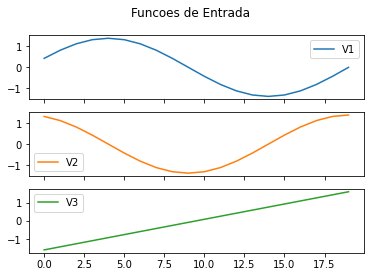

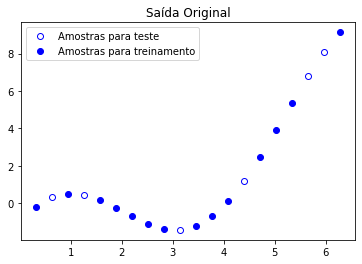

In [295]:
# Importando dados
x = pd.read_csv("dados/x") # Sinal de entrada
y = pd.read_table("dados/y") # Sinal de saida
t = pd.read_table("dados/t") # Tempo de amostragem

# Separando dados de teste e treinamento
trainIdx = [0, 2, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 19]
testIdx = [1, 3, 9, 13, 17, 18]

test_x = pd.DataFrame(x.iloc[testIdx])
test_y = pd.DataFrame(y.iloc[testIdx])
test_t = pd.DataFrame(t.iloc[testIdx])
train_x = pd.DataFrame(x.iloc[trainIdx])
train_y = pd.DataFrame(y.iloc[trainIdx])
train_t = pd.DataFrame(t.iloc[trainIdx])

# Plotting
#    entrada
x.plot(title="Funcoes de Entrada", subplots=True)
plt.show()

#    saida
plt.plot(test_t.to_numpy(), test_y.to_numpy(), 'o', color="blue", mfc='none', label="Amostras para teste")
plt.plot(train_t.to_numpy(), train_y.to_numpy(), 'o', color="blue", label="Amostras para treinamento")
plt.legend()
plt.title("Saída Original")
plt.show()

Treinamento do Neuronio

In [299]:
train_x.reset_index()
print(train_x)

# retlist = trainAdaline(train_x,train_y,0.01,0.001,100,1)

# w = retlist[0]
# erro = retlist[1]

# plt.plot(erro)
# print("w: ", w)

              V1            V2        V3
0   4.259505e-01  1.310941e+00 -1.605793
2   1.115153e+00  8.102061e-01 -1.267731
4   1.378405e+00  1.387568e-16 -0.929670
5   1.310941e+00 -4.259505e-01 -0.760639
6   1.115153e+00 -8.102061e-01 -0.591608
7   8.102061e-01 -1.115153e+00 -0.422577
8   4.259505e-01 -1.310941e+00 -0.253546
10 -4.259505e-01 -1.310941e+00  0.084515
11 -8.102061e-01 -1.115153e+00  0.253546
12 -1.115153e+00 -8.102061e-01  0.422577
14 -1.378405e+00 -1.988550e-16  0.760639
15 -1.310941e+00  4.259505e-01  0.929670
16 -1.115153e+00  8.102061e-01  1.098701
19 -3.291600e-16  1.378405e+00  1.605793
